In [16]:
import pandas as pd

# Defining the file path for dataset
file_path = "../data/sales_and_customer_insights.csv"

# Loading the dataset
df = pd.read_csv(file_path)

# Displaying the basic info
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [17]:
# Exploring Dataset

# Checking dataset shape
df.shape

(10000, 15)

In [18]:
# Checking for any missing values
df.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [19]:
# Checking for the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [20]:
# Checking for the duplicate rows
df.duplicated().sum()

np.int64(0)

In [21]:
# Creating a copy of the dataset before modifications
df_copy = df.copy()

In [22]:
# Converting Date columns Launch_Date, Peak_Sales_Date to 'datetime' format
df_copy['Launch_Date'] = pd.to_datetime(df_copy['Launch_Date'])
df_copy['Peak_Sales_Date'] = pd.to_datetime(df_copy['Peak_Sales_Date'])

In [23]:
# Checking for unique values in categorical columns: 'Most_Frequent_Category', 'Region', 'Season', 'Preferred_Purchase_Times', 'Retention_Strategy'

categorical_cols = ['Most_Frequent_Category', 'Region', 'Season', 'Preferred_Purchase_Times', 'Retention_Strategy']

for col in categorical_cols:
    print(f'{col} unique values: \n{df_copy[col].unique()}\n')

Most_Frequent_Category unique values: 
['Electronics' 'Clothing' 'Sports' 'Home']

Region unique values: 
['South America' 'Asia' 'North America' 'Europe']

Season unique values: 
['Winter' 'Spring' 'Summer' 'Fall']

Preferred_Purchase_Times unique values: 
['Afternoon' 'Evening' 'Morning']

Retention_Strategy unique values: 
['Loyalty Program' 'Discount' 'Email Campaign']



In [24]:
# Describing numerical columns
df_copy.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567,2021-07-01 18:07:46.560000,2023-07-01 08:46:01.920000
min,1.000000,20.010000,5.000000,0.000000,100.160000,2020-01-01 00:00:00,2023-01-01 00:00:00
25%,5.000000,65.262500,25.000000,0.250000,2518.775000,2020-10-04 00:00:00,2023-03-31 00:00:00
50%,10.000000,109.930000,47.000000,0.500000,5012.180000,2021-07-02 00:00:00,2023-07-02 00:00:00
75%,15.000000,155.480000,68.000000,0.750000,7526.232500,2022-03-31 00:00:00,2023-10-01 00:00:00
max,19.000000,199.960000,89.000000,1.000000,9999.760000,2023-01-01 00:00:00,2023-12-31 00:00:00
std,5.526209,52.096870,24.711746,0.288289,2865.420299,NaN,NaN


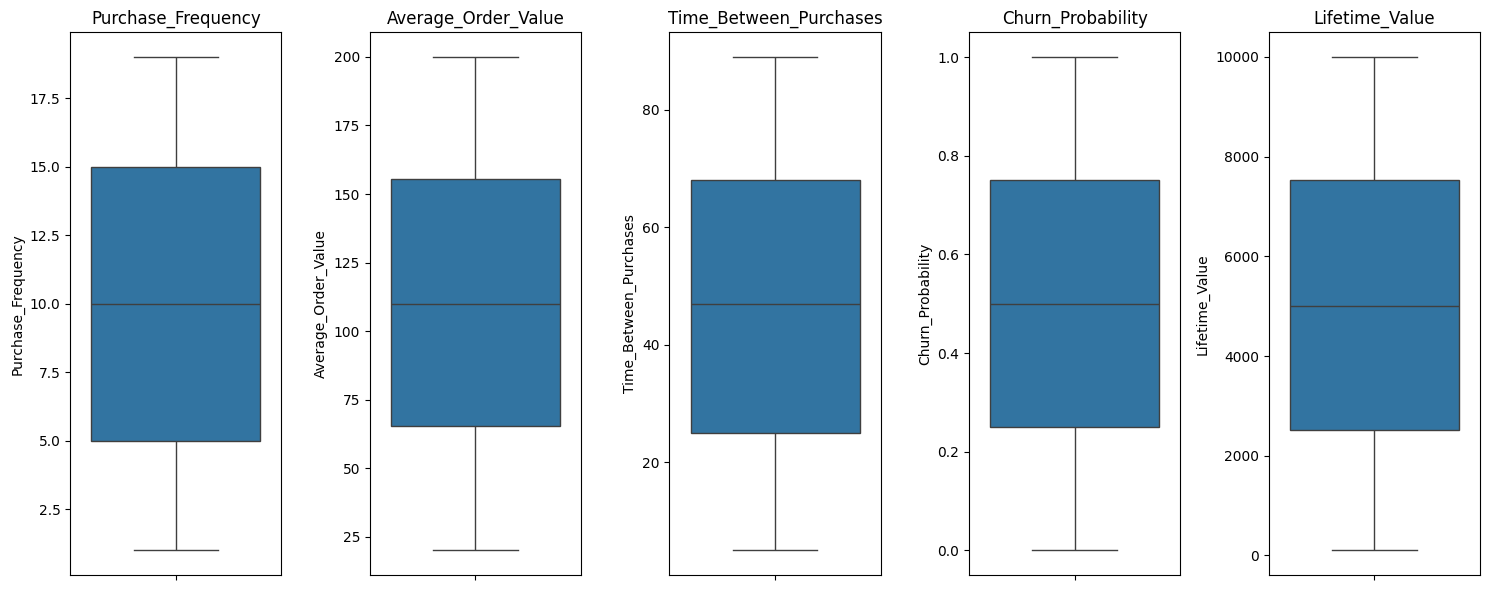

In [25]:
# Visualizing Outliers with Box Plots

import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value']

# Plotting box plots for each numerical column
plt.figure(figsize = (15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y = df_copy[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # lower bound
    upper_bound = Q3 + 1.5 * IQR  # upper bound

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Checking outliers in numerical columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"{col} - Outliers: {len(outliers)}")

Purchase_Frequency - Outliers: 0
Average_Order_Value - Outliers: 0
Time_Between_Purchases - Outliers: 0
Churn_Probability - Outliers: 0
Lifetime_Value - Outliers: 0


In [ ]:
# Above got all Zero Outliers printing the IQR values to check all the datapoints fall within '[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]'

for col in numerical_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: Q1={Q1}, Q3={Q3}, IQR={IQR}")

Purchase_Frequency: Q1=5.0, Q3=15.0, IQR=10.0
Average_Order_Value: Q1=65.2625, Q3=155.48, IQR=90.21749999999999
Time_Between_Purchases: Q1=25.0, Q3=68.0, IQR=43.0
Churn_Probability: Q1=0.25, Q3=0.75, IQR=0.5
Lifetime_Value: Q1=2518.775, Q3=7526.2325, IQR=5007.4575


In [30]:
print(df_copy[numerical_cols].agg(['min', 'max']))

     Purchase_Frequency  Average_Order_Value  Time_Between_Purchases  \
min                   1                20.01                       5   
max                  19               199.96                      89   

     Churn_Probability  Lifetime_Value  
min                0.0          100.16  
max                1.0         9999.76  


In [ ]:
# Function to detect outliers using stricter threshold of 1.2
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.2 * IQR  # lower bound
    upper_bound = Q3 + 1.2 * IQR  # upper bound

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Z-Score Method for outlier detection
from scipy.stats import zscore
df_zscores = df_copy[numerical_cols].apply(zscore)
outliers_z = (df_zscores.abs() > 3).sum()
print(outliers_z)

Purchase_Frequency        0
Average_Order_Value       0
Time_Between_Purchases    0
Churn_Probability         0
Lifetime_Value            0
dtype: int64


### Note: I also performed SQL-based EDA using PostgreSQL. See `Docs/SQL_EDA_Report.md` for details on SQL analysis.